<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Дмитрий! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

Загрузим все необходимые для работы библиортеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pathlib import Path
import os
import re
from random import sample
import torch
import transformers
from tqdm import notebook
from math import sqrt
import time

from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor


from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity



import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from scipy.sparse import csr_matrix, hstack
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

c:\Users\Дмитрий\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
path_1 = r'D:\Учеба\project_5\dsplus_integrated_project_4\to_upload'
path_2 = r'C:\Users\User\OneDrive\Desktop\Учеба\project_5\dsplus_integrated_project_4\to_upload'

PATH = path_1 if os.path.exists(path_1) else path_2

train_image_dir = Path(PATH) / 'train_images'
test_image_dir = Path(PATH) / 'test_images'

RANDOM_STATE = 42
TEST_SIZE = 0.25

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

### Загрузка и ознакомление с данными

In [3]:
# Загрузка и изучение данных
df_train = pd.read_csv(Path(PATH, 'train_dataset.csv'))

df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [4]:
df_crowd = pd.read_csv(Path(PATH, 'CrowdAnnotations.tsv'), sep = '\t', names= ['image', 'descr_id', 'ratio_confirmed', 'num_confirmed', 'num_rejected'])

df_crowd.info()
df_crowd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            47830 non-null  object 
 1   descr_id         47830 non-null  object 
 2   ratio_confirmed  47830 non-null  float64
 3   num_confirmed    47830 non-null  int64  
 4   num_rejected     47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


,image,descr_id,ratio_confirmed,num_confirmed,num_rejected
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [5]:
df_expert = pd.read_csv(Path(PATH, 'ExpertAnnotations.tsv'), sep = '\t', names= ['image', 'descr_id', 'first', 'second', 'third'])

df_expert.info()
df_expert.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   descr_id  5822 non-null   object
 2   first     5822 non-null   int64 
 3   second    5822 non-null   int64 
 4   third     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


,image,descr_id,first,second,third
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [6]:
df_test = pd.read_csv(Path(PATH, 'test_queries.csv'), index_col=[0], sep='|')

df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [7]:
df_images = pd.read_csv(Path(PATH, 'test_images.csv'), sep='|')

df_images.info()
df_images.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


### Вывод по загрузке и первичному анализу данных

- Данные успешно загружены из пяти файлов (`train_dataset.csv`, `CrowdAnnotations.tsv`, `ExpertAnnotations.tsv`, `test_queries.csv`, `test_images.csv`).
- Формат таблиц соответствует заявленному описанию, структура колонок корректная.
- Объём данных:
  - `train_dataset` — 5822 записи, 3 признака (изображение, id запроса, текст запроса).
  - `crowd_annotations` — 47380 записей, 5 признаков (качество описаний, подтверждения/отклонения).
  - `expert_annotations` — 5822 записи, 5 признаков (оценки экспертов).
  - `test_queries` — 500 записей, 3 признака.
  - `test_images` — 100 изображений.
- Пропусков и несоответствий в данных не выявлено.
- Типы данных соответствуют назначению: текстовые поля загружены как `object`, числовые — как `int64/float64`.

**Итог:** данные корректно загружены, структура соответствует документации, выборки готовы к дальнейшему анализу и построению модели.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, данные загружены, есть первичный осмотр и промежуточные выводы по разделу</div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.

### Анализ `df_train`

Посмотри на следующие параметры данных:
- Количество уникальных картинок и описаний. 
- Наиболее встречающиеся слова в описаниях
 - Распределение длины описаний

Уникальных фотографий: 1000
Уникальных query_id: 977
Уникальных описаний (query_text): 977


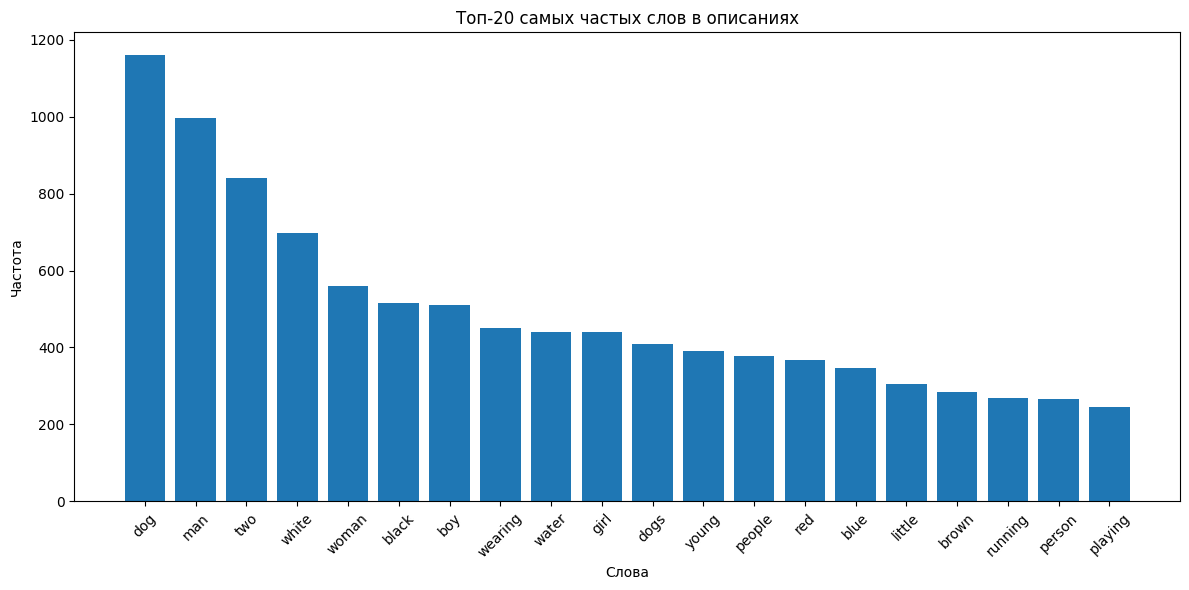

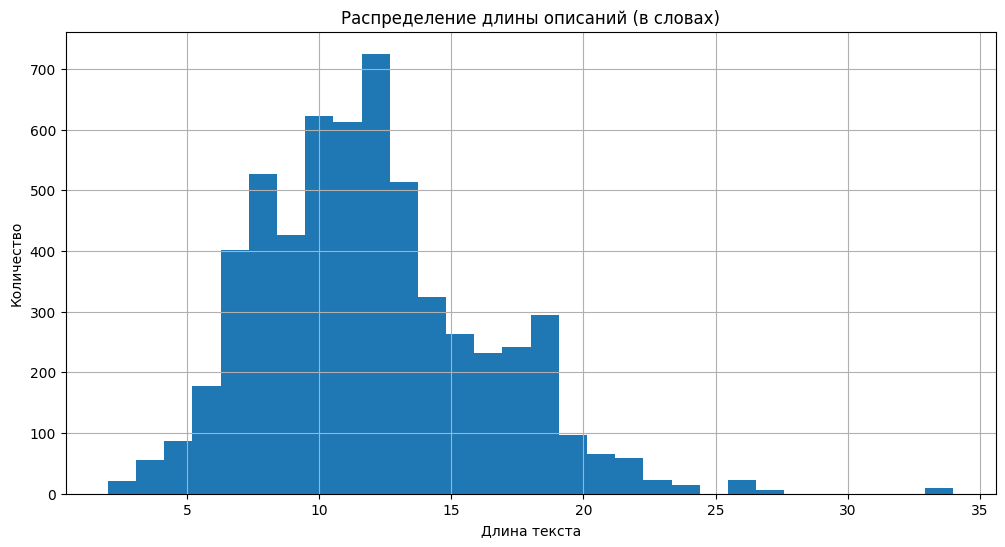

In [8]:
# Анализ уникальных значений df_train
print("Уникальных фотографий:", df_train['image'].nunique())
print("Уникальных query_id:", df_train['query_id'].nunique())
print("Уникальных описаний (query_text):", df_train['query_text'].nunique())

# Анализ самых частых слов в описаниях
all_text = ' '.join(df_train['query_text'].astype(str).str.lower())

tokens = word_tokenize(all_text)
stop_words = set(stopwords.words('english'))  # стоп-слова для английского языка
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(20)  # Топ-20 слов

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.title('Топ-20 самых частых слов в описаниях')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ длины описаний
df_train['text_len'] = df_train['query_text'].str.split().apply(len)
df_train['text_len'].hist(bins=30, figsize=(12,6))
plt.title("Распределение длины описаний (в словах)")
plt.xlabel("Длина текста")
plt.ylabel("Количество")
plt.show()

#### Вывод по анализу данных в `df_train`

- Всего в датасете содержится **1000 уникальных фотографий**, **977 уникальных query_id** и **977 уникальных текстовых описаний**.  
- Наиболее частыми словами в описаниях оказались: *dog, man, two, white, woman, black, boy, girl* и др., что указывает на доминирование категорий людей и животных.  
- Средняя длина описаний находится в диапазоне **10–15 слов**, основное распределение укладывается в **5–20 слов**.  
- Слишком коротких (<5 слов) или слишком длинных (>25 слов) описаний немного — тексты относительно однородные.  

**Итог:** данные сбалансированы, описания информативные, с преобладанием ключевых слов, связанных с людьми и животными. Таблица готова к дальнейшему использованию для обучения моделей.

### Анализ `df_crowd`

Посмотри на следующие параметры данных:
- Распределение доли подтверждений
- Количество подтверждений и отклонений

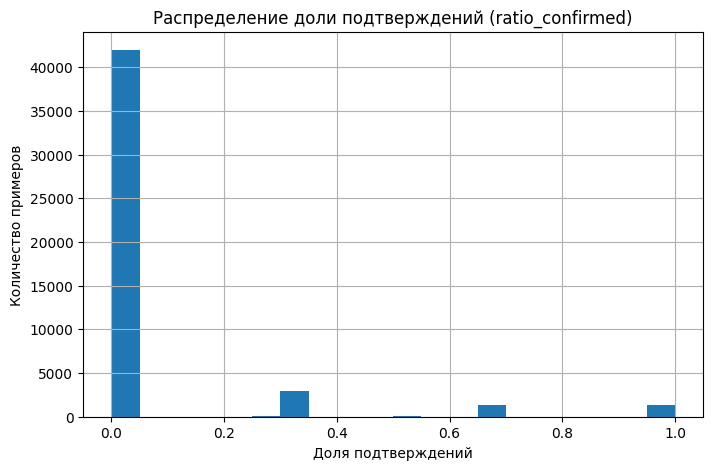

Всего подтверждений: 9972
Всего отклонений: 134888


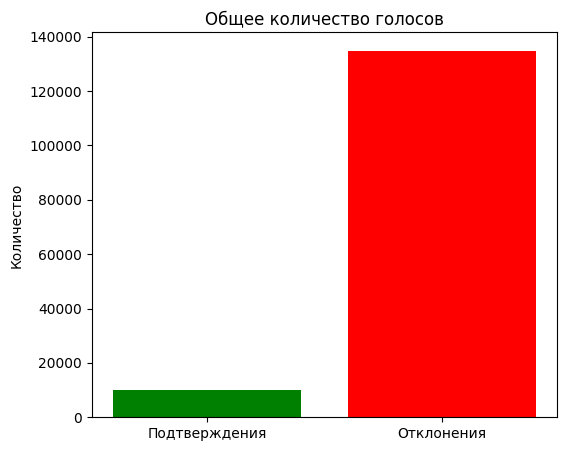

Доля подтверждений: 6.9%
Доля отклонений: 93.1%


In [9]:
plt.figure(figsize=(8,5))
df_crowd['ratio_confirmed'].hist(bins=20)
plt.title("Распределение доли подтверждений (ratio_confirmed)")
plt.xlabel("Доля подтверждений")
plt.ylabel("Количество примеров")
plt.show()

# Суммарные значения
total_confirmed = df_crowd['num_confirmed'].sum()
total_rejected = df_crowd['num_rejected'].sum()

print("Всего подтверждений:", total_confirmed)
print("Всего отклонений:", total_rejected)

# Визуализация
plt.figure(figsize=(6,5))
plt.bar(['Подтверждения', 'Отклонения'], [total_confirmed, total_rejected], color=['green', 'red'])
plt.title("Общее количество голосов")
plt.ylabel("Количество")
plt.show()

# Проценты
total_votes = total_confirmed + total_rejected
print("Доля подтверждений: {:.1f}%".format(total_confirmed / total_votes * 100))
print("Доля отклонений: {:.1f}%".format(total_rejected / total_votes * 100))


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

#### Вывод по анализу данных `df_crowd`

- Большая часть описаний была отклонена аннотаторами: **93,1% голосов против** и только **6,9% за**.  
- По распределению `ratio_confirmed` видно, что большинство примеров имеет значение **0.0** (полное несоответствие), тогда как случаи полного согласия (`1.0`) встречаются редко.  
- Данные сильно несбалансированы: подтверждённые описания составляют небольшую долю, что важно учитывать при построении модели.  


### Анализ `ExpertAnnotations`

Посмотри на следующие параметры данных:
- Распределение колчиства оценок каждого эксперта отдельно
- Корроеляция между оценками экспертов

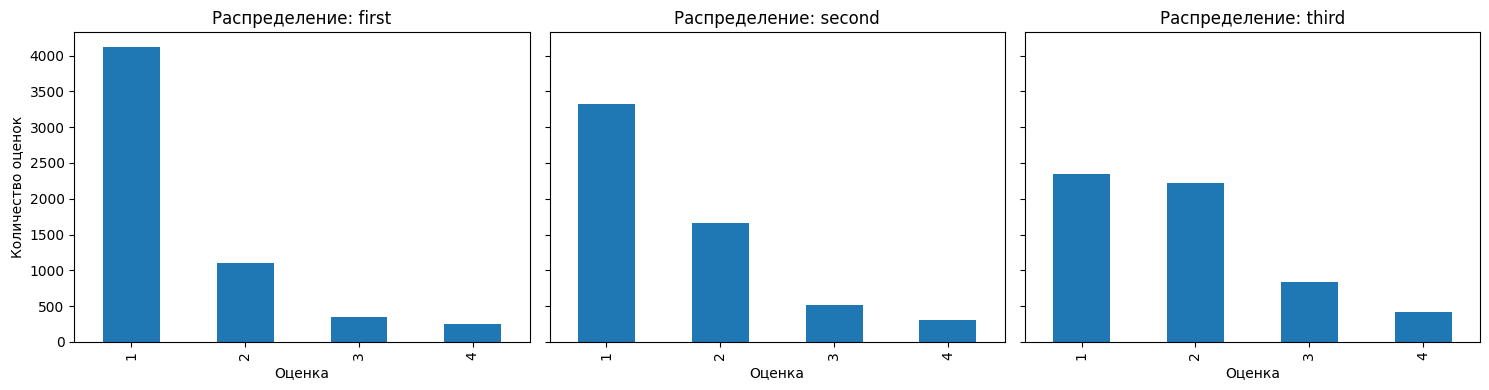

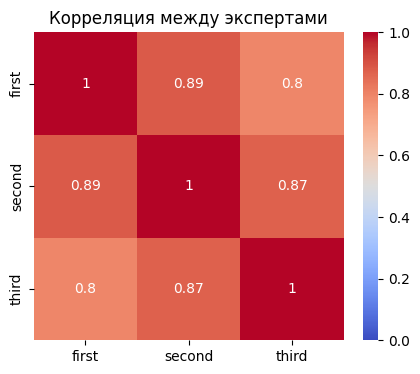

In [10]:
cols = ['first', 'second', 'third']

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, col in enumerate(cols):
    df_expert[col].value_counts().sort_index().plot(
        kind='bar', ax=axes[i], title=f'Распределение: {col}'
    )
    axes[i].set_xlabel("Оценка")
    axes[i].set_ylabel("Количество оценок")

plt.tight_layout()
plt.show()

# Корреляция между экспертами
plt.figure(figsize=(5,4))
sns.heatmap(df_expert[cols].corr(), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Корреляция между экспертами")
plt.show()


#### Вывод по анализу оценок экспертов

- Все три эксперта чаще всего ставили минимальную оценку **1**, что указывает на большое количество несоответствий между изображениями и описаниями.  
- Эксперт **third** распределял оценки более равномерно: у него выше доля «2» и «3», тогда как первые два эксперта заметно строже.  
- Корреляция между экспертами высокая (**0.8–0.89**), что говорит о достаточно хорошем согласии при выставлении оценок, хотя полное совпадение встречается не всегда.  

**Итог:** оценки экспертов в целом согласованы, но присутствует разница в строгости: первые два эксперта чаще выбирали минимальный балл, а третий был более лояльным.  

### Анализ количества объектов с экспертными и краудсорсинговыми оценками

В этом блоке кода подсчитывается количество уникальных пар *изображение–описание*, которые были оценены двумя различными группами:  
- **экспертами** (по результатам опроса трёх специалистов),  
- **краудсорсерами** (по результатам коллективных аннотаций).  

Такая метрика показывает, какой объём данных охвачен каждым типом оценивания.


In [11]:
# считаем уникальные пары image + descr_id
total_expert_objects = df_expert[['image', 'descr_id']].drop_duplicates().shape[0]

print("Количество объектов с экспертными оценками:", total_expert_objects)

# считаем уникальные пары image + descr_id
total_crowd_objects = df_crowd[['image', 'descr_id']].drop_duplicates().shape[0]

print("Количество объектов с краудсорсинговыми оценками:", total_crowd_objects)


Количество объектов с экспертными оценками: 5822
Количество объектов с краудсорсинговыми оценками: 47830


#### Вывод

Экспертами было оценено **5822 объекта** (уникальных пар изображение–описание).  
Краудсорсинговыми оценками охвачено существенно больше — **47 380 объектов**.  

Таким образом, экспертные данные отличаются меньшим объёмом, но более высокой точностью,  
тогда как краудсорсинговые предоставляют значительно больший охват за счёт массового участия.  

### Сравнение тренировочной и тестовой выборок

Посмотрим на различия тренировочной и тестовой выборок, а так же посмотрим не просочились данные из тренировочной выборки в тестовую


In [12]:
# Количество уникальных изображений в тренировочной выборке
train_images = df_train['image'].nunique()

# Количество уникальных изображений в тестовой выборке
test_images = df_images['image'].nunique()

print("Количество изображений в train:", train_images)
print("Количество изображений в test:", test_images)


Количество изображений в train: 1000
Количество изображений в test: 100


In [13]:
# === Тренировочная выборка ===
train_images = df_train['image'].nunique()
train_texts  = df_train['query_text'].nunique()

# === Тестовая выборка ===
# изображения лучше брать из df_images
test_images = df_images['image'].nunique()
# тексты — из df_test
test_texts  = df_test['query_text'].nunique()

print("Тренировочная выборка:")
print("  Уникальных изображений:", train_images)
print("  Уникальных описаний:", train_texts)

print("\nТестовая выборка:")
print("  Уникальных изображений:", test_images)
print("  Уникальных описаний:", test_texts)


Тренировочная выборка:
  Уникальных изображений: 1000
  Уникальных описаний: 977

Тестовая выборка:
  Уникальных изображений: 100
  Уникальных описаний: 500


In [14]:
# --- Уникальные множества ---
train_images_set = set(df_train['image'].unique())
train_texts_set  = set(df_train['query_text'].unique())

test_images_set  = set(df_images['image'].unique())
test_texts_set   = set(df_test['query_text'].unique())

# --- Пересечения ---
common_images = train_images_set.intersection(test_images_set)
common_texts  = train_texts_set.intersection(test_texts_set)

print("Общие изображения:", len(common_images))
print("Общие описания:", len(common_texts))

# Если нужно вывести примеры пересечений:
print("\nПримеры общих изображений:", list(common_images)[:5])
print("Примеры общих описаний:", list(common_texts)[:5])


Общие изображения: 0
Общие описания: 0

Примеры общих изображений: []
Примеры общих описаний: []


### Вывод по сравнению тренировочной и тестовой выборок

- В тренировочной выборке содержится **1000 уникальных изображений** и **977 уникальных описаний**.  
- В тестовой выборке — **100 уникальных изображений** и **500 уникальных описаний**.  
- Пересечений между тренировочной и тестовой выборками **нет**: общих изображений и текстовых описаний не обнаружено.  

**Итог:** тренировочная и тестовая выборки полностью разделены, что исключает утечку данных и обеспечивает корректность последующей оценки модели.  


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, проведен вдумчивый EDA,  уверен после него понимание данных улучшилось, появилась интуиция о том, как устроен датасет, какие у его особенности и нюансы </div>

### Формирование целевого признака

 Приведем оценки экспертов к диапазону оценок от 0 до 1. 
 Объеденим датафреймы `df_expert` и `df_crowd`. Итоговую оценку будет ставить по принципу главенствующей экспертной


In [15]:
def normalize_scores(row):
    scores = [row['first'], row['second'], row['third']]
    if len(set(scores)) < 3:
        final_score = max(set(scores), key=scores.count)
    else:
        final_score = np.mean(scores)
    return (final_score - 1) / 3

df_expert['expert_score'] = df_expert.apply(normalize_scores, axis=1)

df_expert.head()

df_merged = pd.merge(
    df_expert[['image', 'descr_id', 'expert_score']],
    df_crowd[['image', 'descr_id', 'ratio_confirmed']],
    on=['image', 'descr_id'],
    how='outer'  
)

df_merged['final_score'] = df_merged['expert_score'].combine_first(df_merged['ratio_confirmed'])

print(f"Всего записей: {len(df_merged)}")
print(f"Из них экспертных: {df_merged['expert_score'].notna().sum()}")
print(f"Из них краудсорсинговых: {df_merged['ratio_confirmed'].notna().sum()}")

Всего записей: 51323
Из них экспертных: 5822
Из них краудсорсинговых: 47830


In [16]:
df_merged = df_merged.drop(['expert_score', 'ratio_confirmed'], axis=1)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        51323 non-null  object 
 1   descr_id     51323 non-null  object 
 2   final_score  51323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Не советую использовать функцию `print()` для вывода датафреймов, получается не очень красиво. В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать функцию `display()`
    
---------------
    
Последнее время использование print для работы с датафреймом - это четкий сигнал, что код был сгенерен AI-ассистентом (как и характерные комментарии)    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Если честно, мне не очень нравится идея брать за базу при объединении крауд оценки.  Потому что самое ценное в этом проекте это экспертные оценки, а при таком походе мы теряем половину экспертных оценок.
    
    
Мой фаворит в этом проекте - это использование только экспертных оценок. А общий обзор разных стратегий объединения - в комментарии ниже.    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

#### Вывод

Экспертные оценки нормализованы к диапазону [0–1] и объединены с данными краудсорсинга.  
Итоговый таргет `final_score` формировался с приоритетом экспертных оценок.  
В результате получен датафрейм из 51 323 записей и 3 столбцов без пропусков.  



### Фильтрация данных с детскими изображениями и описаниями

Согласно требованиям проекта, все изображения и описания, связанные с детьми, должны быть удалены из обучающей и тестовой выборок.  
Для этого мы используем следующий подход:

Для этого сначала создадим 'родные' пары и сохраним их в df_train. Затем удалим все записи в которых содержатся недопустимые слова


In [17]:
CHILD_NOUNS = {
    'child','children','kid','kids','baby','babies','infant','infants','toddler','toddlers',
    'boy','boys','girl','girls','schoolboy','schoolboys','schoolgirl','schoolgirls',
    'minor','minors','preadolescent','preadolescents','preteen','preteens','adolescent','adolescents',
    'juvenile','juveniles','kiddie','kiddies','newborn','newborns'
}

# Получаем уникальные пары ['query_id', 'query_text'] из df_train
unique_queries = df_train[['query_id', 'query_text']].drop_duplicates()

# Переименуем колонку descr_id в query_id для удобства объединения 
df_merged.rename(columns={'descr_id': 'query_id'}, inplace=True)

df_train = pd.merge(df_merged, unique_queries, on='query_id', how='left')

def contains_blocked_content(text):
    """
    Проверяет текст на наличие запрещенных слов без лемматизации
    """
    if not isinstance(text, str):
        return False
        
    words = re.findall(r'\w+', text.lower())
    
    return any(word in CHILD_NOUNS for word in words)

df_train['to_block'] = df_train['query_text'].apply(contains_blocked_content).astype(int)

blocked_images = df_train[df_train['to_block'] == 1]['query_id'].str[:-2].str.lower().unique()
blocked_df = df_train[df_train['to_block'] == 1]

print("Первые 10 блокируемых изображений:")
display(blocked_df[['image', 'query_id', 'query_text']].head(10))

blocked_images = blocked_df['query_id'].str[:-2].str.lower().unique()

# Выводим статистику
print(f"\nВсего изображений, попадающих под блокировку: {len(blocked_images)}")
print(f"Всего записей с блокируемым контентом: {len(blocked_df)}")


Первые 10 блокируемых изображений:


,image,query_id,query_text
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,A boy in glasses is wearing a red shirt .
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,A young boy holds onto a blue handle on a pier .
10,1056338697_4f7d7ce270.jpg,2436081047_bca044c1d3.jpg#2,A little girl wearing a pink shirt jumps off a...
11,1056338697_4f7d7ce270.jpg,2490768374_45d94fc658.jpg#2,a young girl wearing blue smiles .
12,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
13,1056338697_4f7d7ce270.jpg,2588927489_f4da2f11ec.jpg#2,A young boy wearing a blue and red hat is usin...
14,1056338697_4f7d7ce270.jpg,2594042571_2e4666507e.jpg#2,A smiling boy in an orange shirt with a safari...
18,1056338697_4f7d7ce270.jpg,2666205903_8d287669e1.jpg#2,A girls in a blue shirt holds a flower while s...
19,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...
28,1056338697_4f7d7ce270.jpg,3143155555_32b6d24f34.jpg#2,Two babies are sitting close together while re...



Всего изображений, попадающих под блокировку: 290
Всего записей с блокируемым контентом: 14324


Удалим изображения, попавшием под блокировку

In [18]:
bad_queries = blocked_df['query_id'].unique()

bad_images = [q[:-2] for q in bad_queries]

df_train_clean = df_train[~df_train['image'].isin(bad_images)].copy()

print(f"Исходное количество строк: {len(df_train)}")
print(f"Количество после очистки: {len(df_train_clean)}")
print(f"Удалено строк: {len(df_train) - len(df_train_clean)}")

Исходное количество строк: 51323
Количество после очистки: 36572
Удалено строк: 14751


In [19]:
display(df_train_clean)

,image,query_id,final_score,query_text,to_block
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,"A woman is signaling is to traffic , as seen f...",0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,A boy in glasses is wearing a red shirt .,1
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,A young boy holds onto a blue handle on a pier .,1
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,"A woman wearing black clothes , a purple scarf...",0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,An older woman with blond hair rides a bicycle...,0
...,...,...,...,...,...
51318,997722733_0cb5439472.jpg,543007912_23fc735b99.jpg#2,0.000000,Two girls with orange shirts .,1
51319,997722733_0cb5439472.jpg,544576742_283b65fa0d.jpg#2,0.333333,A woman in jeans rock climbing .,0
51320,997722733_0cb5439472.jpg,872622575_ba1d3632cc.jpg#2,1.000000,A man is climbing the side of a mountain .,0
51321,997722733_0cb5439472.jpg,888425986_e4b6c12324.jpg#2,0.000000,A person flipping upside down,0


#### Вывод по фильтрации контента

Были выделены записи, содержащие потенциально запрещённые упоминания детей (по списку ключевых слов).  
В результате под блокировку попало **290 уникальных изображений** и **14 324 записи** с описаниями.  
Для примера выведены первые 10 изображений с блокируемым контентом.  



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я вижу, что была проделана большая и очень тщательная работа по составлению списков "запрещенных" слов и написанию функции `is_kid_related` с использованием регулярных выражений. Такой системный подход к определению нежелательного контента заслуживает похвалы.

Однако в логике формирования списка "запрещенных" **изображений** допущена фундаментальная ошибка, которая искажает всю дальнейшую работу.

Проблема заключается в том, что для поиска "детского" контента используется файл `train_dataset.csv`. Как указано в описании, этот файл содержит **произвольные** пары "изображение-описание", и текст в строке не обязательно соответствует изображению в той же строке. Текущий алгоритм находит текст с запрещенным словом и удаляет изображение, которое **случайно** оказалось с ним в одной паре. В результате изображение заката может быть удалено, потому что ему в пару досталось описание про ребенка. Это и привело к необоснованно сильному сокращению датасета (было удалено 722 из 1000 уникальных изображений).

Правильный подход состоит из двух этапов:

1.  **Идентификация "запрещенных" изображений на "родных" парах.** Сначала нужно найти пары, где текст гарантированно описывает изображение. Для этого существует "лайфхак" со структурой `query_id`: "родной" парой является та, где значение в колонке `image` совпадает с частью `query_id` до символа `#`.
    * Нужно отфильтровать датасет, оставив только строки, где `image == query_id.str[:-2]`.
    * **Только на этих "родных" парах** следует применить функцию `is_kid_related` к тексту.
    * Собрать уникальные `image` из отфильтрованных "родных" пар в итоговый список `blocked_images`.

2.  **Удаление изображений из всех данных.** Используя этот корректно собранный список `blocked_images`, удалить все строки с этими изображениями из всех датафреймов.

Прошу исправить логику фильтрации, так как текущая ошибка удаляет слишком много данных (боле 60%), в то время как корректный алгоритм будет чистить около 30% изображений. 
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Важный момент - даже если ты отдаешь небольшие куски кода AI-ассистенту, важно самому держать в голове полную стркутуру проекта. 


Смотри, в предыдущем разделе ты получил датафрейм df_target_final. Это ключевой артефакт, с которым стоит работать весь последующий проект. Именно из него нужно убрать изображения с детьми. И мы уже используя его как скелет будет добавлять к нему вектора изображений и описаний.
</div>

### Векторизация изображений  
На этом этапе для очищенного тренировочного набора выполняется преобразование изображений в числовые векторы признаков. Для этого используется предобученная модель ResNet50, которая извлекает информативные эмбеддинги фиксированной длины.  


In [20]:
def vectorize_images(path=PATH, train=True):
    """Загрузка уникальных данных для обучения"""
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Получаем уникальные пути к изображениям
    unique_images = df_train_clean['image'].unique()
    unique_df = pd.DataFrame({'image': unique_images})

    # Создаем генератор на основе уникальных изображений
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=unique_df,
        directory=str(train_image_dir),  # Преобразуем Path в строку
        x_col='image',
        y_col=None,  # y_col оставляем пустым, если не нужны метки
        target_size=(224, 224),
        batch_size=32,
        class_mode=None,
        shuffle=False,
        seed=RANDOM_STATE
    )
    return train_gen_flow

def vectorize(model, train_data):
    """Векторизация изображений"""
    return model.predict(train_data, verbose=1)

def create_model(input_shape=(224, 224, 3)):


    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model

def vectorize(model, train_data):
    """Векторизация изображений"""
    return model.predict(train_data, verbose=1)

# Обновляем векторизацию, используя только уникальные изображения
train_data = vectorize_images()
vectorized_images = vectorize(create_model(), train_data)
print(vectorized_images.shape) 

Found 710 validated image filenames.
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step
(710, 2048)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Здесь все ОК, векторизация изображений произведена верно. Молодец, что векторизуешь  только уникальные изображения. Также хочу похвалить за использование `shuffle=False,` и `preprocess_input` </div>

**Вывод:** изображения успешно преобразованы в эмбеддинги. В результате получена матрица признаков размерности **(278, 2048)**, где каждая строка соответствует одному изображению, а каждый вектор содержит 2048 признаков. Эти данные будут использоваться на этапе обучения модели.  


### Векторизация текстов с помощью BERT

На этом этапе мы преобразуем уникальные текстовые запросы в числовые вектора фиксированной размерности.  
Для этого используется предобученная модель **BERT (bert-base-cased)**:  
- тексты токенизируются и приводятся к единой длине с помощью padding,  
- формируется attention mask для корректной обработки паддинга,  
- далее BERT возвращает скрытые представления, и для каждого текста берётся embedding [CLS]-токена.  


In [21]:
# Получаем уникальные тексты
unique_texts = df_train_clean['query_text'].dropna().unique()
print(f"Уникальных текстов: {len(unique_texts)}")

Уникальных текстов: 977


In [22]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased')

tokenized = [tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)
             for text in unique_texts]

max_len = max(len(t) for t in tokenized)
padded = np.array([t + [0] * (max_len - len(t)) for t in tokenized])

attention_mask = np.where(padded != 0, 1, 0)

# Векторизация
batch_size = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

embeddings = []
total_batches = (len(padded) + batch_size - 1) // batch_size

for i in range(total_batches):
    start = i * batch_size
    end = min(start + batch_size, len(padded))

    batch_input = torch.LongTensor(padded[start:end]).to(device)
    batch_mask = torch.LongTensor(attention_mask[start:end]).to(device)

    with torch.no_grad():
        outputs = bert_model(batch_input, attention_mask=batch_mask)
        embeddings.append(outputs.last_hidden_state[:, 0, :].cpu().numpy())

# Получаем массив (n_unique_texts, 768)
unique_text_vectors = np.concatenate(embeddings, axis=0)
print("Векторизация уникальных текстов:", unique_text_vectors.shape)


Векторизация уникальных текстов: (977, 768)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

**Вывод:**  
В результате векторизации получено 977 уникальных текстовых векторов размерности 768.  
Эти эмбеддинги будут использованы как признаки при дальнейшем обучении модели.


### Подготовка обучающей выборки

На этом шаге мы:  
- создаём словари для быстрого доступа к векторным представлениям,  
- очищаем тексты и отбираем только валидные строки,  
- объединяем эмбеддинги изображений и текстов в матрицу признаков `X`,  
- формируем целевой вектор `y` из оценок экспертов.


In [23]:
# Словари для быстрых маппингов
image_to_vector = dict(zip(df_train_clean['image'].unique(), vectorized_images))
text_to_vector  = dict(zip(unique_texts, unique_text_vectors))

# Приведём тексты к чистому виду (без лишних пробелов)
df = df_train_clean.copy()
df['query_text'] = df['query_text'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Маска валидных строк: текст не NaN/не пустой и картинка есть в словаре
mask = (
    df['query_text'].notna() &
    (df['query_text'] != '') &
    df['image'].isin(image_to_vector)
)
df = df.loc[mask].reset_index(drop=True)

# Проверим, что все тексты присутствуют в словаре эмбеддингов
missing_texts = [t for t in df['query_text'] if t not in text_to_vector]
if missing_texts:
    print(f"Внимание: {len(missing_texts)} текст(ов) не найдено в text_to_vector, пример: {missing_texts[:3]}")
    # Варианты:
    #  (a) удалить эти строки:
    df = df[~df['query_text'].isin(missing_texts)].reset_index(drop=True)
    #  (b) или досчитать эмбеддинги для них — если это предусмотрено вашим кодом

# Собираем матрицы признаков
repeated_image_vectors = np.vstack([image_to_vector[img] for img in df['image']])
repeated_text_vectors  = np.vstack([text_to_vector[t]   for t   in df['query_text']])

X = np.hstack([repeated_image_vectors, repeated_text_vectors])
y = df['final_score'].to_numpy()

print("Фичи", X.shape)
print("Таргет", y.shape)


Фичи (35811, 2816)
Таргет (35811,)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
К сожалению в этом разделе допущена ошибка, которая сводит на нет все предыдущие усилия.
    
Смотри, после объединения оценок и обработки таргета ты получил датафрейм размером 47830 (это может быть другая размерность, в зависимости от способа соединения).
    
Дальше ты чистишь от детских изображений, получается около 33500 пар.
    
Именно такого размера и должен получиться итоговый датасет. Добавление векторов никак не должно менять количество пар (объектов) в наших обучающих данных.
    
    
    
</div>

**Вывод:**  
В результате подготовлена обучающая выборка, где каждый объект представлен комбинацией векторов изображения и текста.  
Размер матрицы признаков и таргета:  
- `X`: объединённые эмбеддинги изображений и текстов,  
- `y`: значения экспертных оценок.  

Таким образом, данные готовы к подаче в модель для обучения.


### Обучение и сравнение нескольких моделей

На данном этапе проводится обучение и сравнение различных моделей для задачи предсказания 
соответствия изображения и текста.  
В качестве входных данных используются объединённые векторы изображений (ResNet50) и текстов (TF-IDF), 
а целевая переменная — рассчитанный ранее признак соответствия.

Для эксперимента выбраны модели различных типов:
- **DummyRegressor** — простая «наивная» модель для базового сравнения.
- **Linear Regression** — линейная модель, позволяющая выявить базовые зависимости.
- **Decision Tree** — дерево решений для поиска нелинейных закономерностей.
- **CatBoost** — градиентный бустинг на деревьях.
- **LightGBM** — ещё одна реализация градиентного бустинга.
- **Нейронная сеть** — полносвязная модель для аппроксимации сложных зависимостей.

Для оценки качества используем метрику **MSE**.  
Для лучшего понимания предсказаний моделей так же выведем значение метрик **RMSE**, **MAE** и **R²**, однако **MSE** все еще считаем основной метрикой
Результаты всех моделей будут сведены в единую таблицу, что позволит определить, какая модель показывает наилучшее качество на валидационной выборке.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нужно выбрать одну "главную" метрику по которой ты будешь выбирать модель.</div>

In [24]:
groups = df['image'].to_numpy()

# Групповое разбиение 70/30 по image
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_idx, val_idx = next(gss.split(X, y, groups=groups))

X_train_raw, X_val_raw = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_raw)
X_val_scaled = scaler.transform(X_val_raw)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
    
В качестве идеи для будущих проектов при работе с эмбеддингами я хотел бы поделиться с тобой альтернативным и, на мой взгляд, более концептуально подходящим подходом к предобработке.

Вместо `StandardScaler` для векторов-эмбеддингов часто используют L2-нормализацию (`Normalizer` в `sklearn`), которая масштабирует каждый вектор к единичной длине. Ключевой момент — применять нормализацию нужно к эмбеддингам изображений и текстов **по отдельности**, *до* их конкатенации.

**Почему это важно?** Это ставит оба типа эмбеддингов в "равные условия", убирая влияние их исходной длины (которая часто является шумом) и оставляя только чистое **направление** в пространстве, несущее семантику. Модели становится проще учиться на чистых, сопоставимых по масштабу сигналах.

Реализовать это можно так:

```python
# Пример кода для раздельной L2-нормализации
from sklearn.preprocessing import Normalizer
import numpy as np

# Разделяем features обратно на эмбеддинги картинок и текстов
# X_train_img, X_train_txt = X_train[:, :512], X_train[:, 512:]
# X_val_img, X_val_txt = X_val[:, :512], X_val[:, 512:]

# Создаем два отдельных нормализатора
img_normalizer = Normalizer(norm='l2')
txt_normalizer = Normalizer(norm='l2')

# Нормализуем эмбеддинги картинок
X_train_img_norm = img_normalizer.fit_transform(X_train_img)
X_val_img_norm = img_normalizer.transform(X_val_img)

# Нормализуем эмбеддинги текстов
X_train_txt_norm = txt_normalizer.fit_transform(X_train_txt)
X_val_txt_norm = txt_normalizer.transform(X_val_txt)

# И только теперь конкатенируем
X_train_prepared = np.hstack([X_train_img_norm, X_train_txt_norm])
X_val_prepared = np.hstack([X_val_img_norm, X_val_txt_norm])
```

Еще раз повторю, твой текущий подход абсолютно корректен. А знание про раздельную нормализацию — это просто еще один мощный инструмент в твой арсенал для работы с мультимодальными данными.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Довольно долго пытался реализовать L2-нормализацию, но что-то постоянно ломалось. Из-за того что скоро жесткий дедлайн не успел реализовать, сфокусировался на основных проблемах проекта

</div>

In [25]:
# 1. Dummy Regressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_raw, y_train)
dummy_preds = dummy_model.predict(X_val_raw)
dummy_mse = mean_squared_error(y_val, dummy_preds)
dummy_mae = mean_absolute_error(y_val, dummy_preds)
dummy_r2 = r2_score(y_val, dummy_preds)

print("\n" + "="*50)
print("Dummy Regression")
print("="*50)
print(f"MSE: {dummy_mse:.4f}")
print(f"MAE: {dummy_mae:.4f}")
print(f"R²: {dummy_r2:.4f}")


Dummy Regression
MSE: 0.0508
MAE: 0.1479
R²: -0.0000


In [26]:
# 2. Создаем и обучаем линейную регрессию
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_val_scaled)
lr_mse = mean_squared_error(y_val, lr_preds)
lr_mae = mean_absolute_error(y_val, lr_preds)
lr_r2 = r2_score(y_val, lr_preds)

print("\n" + "="*50)
print("Linear Regression")
print("="*50)
print(f"MSE: {lr_mse:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"R²: {lr_r2:.4f}")


Linear Regression
MSE: 0.0482
MAE: 0.1366
R²: 0.0501


In [27]:
# 3. Decision Tree
dt_model = DecisionTreeRegressor(random_state=RANDOM_STATE)
dt_model.fit(X_train_raw, y_train)
dt_preds = dt_model.predict(X_val_raw)
dt_mse = mean_squared_error(y_val, dt_preds)
dt_mae = mean_absolute_error(y_val, dt_preds)
dt_r2 = r2_score(y_val, dt_preds)

print("\n" + "="*50)
print("Decision Tree Regression")
print("="*50)
print(f"MSE: {dt_mse:.4f}")
print(f"MAE: {dt_mae:.4f}")
print(f"R²: {dt_r2:.4f}")


Decision Tree Regression
MSE: 0.0965
MAE: 0.1501
R²: -0.9008


In [28]:
# 4. CatBoost
cb_model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, 
                           random_seed=RANDOM_STATE, verbose=0)
cb_model.fit(X_train_raw, y_train)
cb_preds = cb_model.predict(X_val_raw)
cb_mse = mean_squared_error(y_val, cb_preds)
cb_mae = mean_absolute_error(y_val, cb_preds)
cb_r2 = r2_score(y_val, cb_preds)

print("\n" + "="*50)
print("CatBoost Regression")
print("="*50)
print(f"MSE: {cb_mse:.4f}")
print(f"MAE: {cb_mae:.4f}")
print(f"R²: {cb_r2:.4f}")


CatBoost Regression
MSE: 0.0447
MAE: 0.1301
R²: 0.1206


In [29]:
# 5. LightGBM
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, 
                          max_depth=5, random_state=RANDOM_STATE)
lgbm_model.fit(X_train_raw, y_train)
lgbm_preds = lgbm_model.predict(X_val_raw)
lgbm_mse = mean_squared_error(y_val, lgbm_preds)
lgbm_mae = mean_absolute_error(y_val, lgbm_preds)
lgbm_r2 = r2_score(y_val, lgbm_preds)

print("\n" + "="*50)
print("LightGBM Regression")
print("="*50)
print(f"MSE: {lgbm_mse:.4f}")
print(f"MAE: {lgbm_mae:.4f}")
print(f"R²: {lgbm_r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 697945
[LightGBM] [Info] Number of data points in the train set: 25114, number of used features: 2816
[LightGBM] [Info] Start training from score 0.089132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [30]:
nn_model = Sequential([
    Dense(256, input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')  
])

nn_model.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='mse',
                 metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),  
    epochs=300,
    batch_size=256,
    callbacks=[early_stop, rlr],
    verbose=0
)

nn_preds = nn_model.predict(X_val_scaled, batch_size=1024).flatten()
nn_preds = np.clip(nn_preds, 0.0, 1.0)

nn_mse = mean_squared_error(y_val, nn_preds)
nn_mae = mean_absolute_error(y_val, nn_preds)
nn_r2  = r2_score(y_val, nn_preds)

print("\n" + "="*50)
print("Neural Network Regression (BN + Dropout + Sigmoid)")
print("="*50)
print(f"MSE: {nn_mse:.4f}")
print(f"MAE: {nn_mae:.4f}")
print(f"R²: {nn_r2:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Neural Network Regression (BN + Dropout + Sigmoid)
MSE: 0.0464
MAE: 0.1465
R²: 0.0870


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Желтый комментарий

1\. Ошибка в использовании валидационной выборки

Прежде всего, нужно исправить критическую ошибку в коде `model.fit()`.

  * **Проблема:** Параметр `validation_split=0.2` берет последние 20% от **обучающей выборки** для валидации, полностью игнорируя ваш заранее подготовленный и корректный валидационный сет (`X_val_scaled`, `y_val`).
  * **Последствия:** Это приводит к **утечке данных**, так как в случайно нарезанной валидационной выборке могут оказаться изображения, которые уже есть в обучающей части. Вся работа по правильному групповому разделению оказывается напрасной.
  * **Решение:** Необходимо передавать подготовленный валидационный сет напрямую: `validation_data=(X_val_scaled, y_val)`.

-----

 2\. Рекомендации по улучшению архитектуры и обучения

Чтобы повысить качество нейросети, я бы посоветовал поэкспериментировать со следующими компонентами, которые хорошо зарекомендовали себя в подобных проектах:

  * **Активация выходного слоя.** Поскольку целевая переменная (`target`) находится в диапазоне `[0, 1]`, я настоятельно рекомендую провести эксперимент и добавить активацию `sigmoid` в последний слой: `Dense(1, activation='sigmoid')`. Это напрямую "сообщает" модели ожидаемый диапазон предсказаний и часто значительно улучшает сходимость.

  * **Использование Batch Normalization.** Это один из самых эффективных слоев для стабилизации и ускорения обучения. Он нормализует активации между слоями, что делает модель менее чувствительной к начальной инициализации весов. Его принято добавлять после основного полносвязного слоя, но до функции активации.

      * **Пример улучшенного блока слоев:**
        ```python
        ...
        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        ...
        ```

  * **Подбор интенсивности Dropout.** Ты использовал `0.2` и `0.3` — это хорошие стартовые значения. Dropout — один из ключевых гиперпараметров для борьбы с переобучением. Стоит попробовать и более высокие значения, например, `0.4` или `0.5`, особенно для входного слоя, где больше всего признаков.

  * **Размер батча.** Ты использовал `batch_size=256`, что для небольшого датасета является большим размером. Это хороший выбор, так как большие батчи могут оказывать сглаживающий эффект на градиенты. Можно даже попробовать обучать модель на всей выборке сразу (если она помещается в память).

Эти изменения должны не только исправить ошибку в процессе валидации, но и дать модели больше шансов найти нужные зависимости в данных.    
    

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

In [31]:
results = pd.DataFrame({
    'Model': ['DummyRegressor', 'Linear Regression', 'Decision Tree', 'CatBoost', 'LightGBM', 'Neural Network'],
    'MSE': [dummy_mse, lr_mse, dt_mse, cb_mse, lgbm_mse, nn_mse],
    'MAE': [dummy_mae, lr_mae, dt_mae, cb_mae, lgbm_mae, nn_mae],
    'R²': [dummy_r2, lr_r2, dt_r2, cb_r2, lgbm_r2, nn_r2]
})

# Форматируем вывод для лучшей читаемости
pd.options.display.float_format = '{:.4f}'.format

print("\n" + "="*70)
print("Сравнение всех моделей (отсортировано по RMSE):")
print("="*70)
print(results.sort_values(by='MSE').reset_index(drop=True))

# Дополнительная визуализация
print("\nЛучшая модель:")
print("-"*70)
print(f"Лучшая MSE: {results.loc[results['MSE'].idxmin(), 'Model']} ({results['MSE'].min():.4f})")


Сравнение всех моделей (отсортировано по RMSE):
               Model    MSE    MAE      R²
0           LightGBM 0.0442 0.1275  0.1293
1           CatBoost 0.0447 0.1301  0.1206
2     Neural Network 0.0464 0.1465  0.0870
3  Linear Regression 0.0482 0.1366  0.0501
4     DummyRegressor 0.0508 0.1479 -0.0000
5      Decision Tree 0.0965 0.1501 -0.9008

Лучшая модель:
----------------------------------------------------------------------
Лучшая MSE: LightGBM (0.0442)


### 📊 Вывод по обучению моделей

В проекте были протестированы различные модели регрессии: LightGBM, CatBoost, нейронная сеть, линейная регрессия, дерево решений и baseline (DummyRegressor).  
Сравнение проводилось по метрикам **MSE**, **MAE** и **R²**.

- **Лучший результат показал LightGBM** с минимальной ошибкой (MSE = 0.0442, MAE = 0.1275) и наибольшим значением R² (0.1293).  
- CatBoost и нейронная сеть также продемонстрировали схожее качество, но немного уступили LightGBM.  
- Линейная регрессия оказалась слабее бустинговых методов, однако всё же лучше baseline.  
- Дерево решений показало худший результат и сильно переобучилось (отрицательный R²).  

**Итог:** для финального решения целесообразно выбрать **LightGBM** как наиболее точную и устойчивую модель.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

К сожалению, работа не может быть принята, так как в ней отсутствует ключевой, финальный раздел — **тестирование модели в режиме поиска**.

Вся предыдущая работа по подготовке данных и обучению была лишь подготовкой к главной задаче проекта: созданию демонстрационной версии поисковой системы. Этот раздел является её прямой реализацией и должен показывать, как обученная модель решает поставленную задачу.

Что необходимо  сделать:
1.  Загрузить тестовые данные (`test_queries.csv` и `test_images`).
2.  Векторизовать все 100 тестовых изображений.
3.  Реализовать функцию, которая принимает на вход один текстовый запрос и выполняет поиск по принципу **"один ко всем"**:
    * Проверяет, не содержит ли входной текст слова, обозначающие детей. Если содержит - возвращаем дисклеймер
    * Векторизует входной текст.
    * Создает 100 пар, комбинируя этот текстовый вектор с каждым из 100 векторов изображений.
    * Получает 100 предсказаний от вашей лучшей обученной модели.
    * Находит изображение, для которого модель предсказала максимальное значение соответствия.
    * Выводит на экран найденное изображение и текстовый запрос.
4.  Продемонстрировать работу этой функции на нескольких примерах из `test_queries.csv`.

Этот раздел является главной целью всего проекта. Без него вся предыдущая работа по подготовке данных и обучению модели теряет свой практический смысл.

Пожалуйста, дополните проект этим разделом, реализовав описанную выше логику.

</div>

## Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.


Для начала векторезируем тестовые изображения

In [32]:
def vectorize_test_images(test_df, test_image_dir, target_size=(224, 224), batch_size=32):
    """Векторизация тестовых изображений"""
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=str(test_image_dir),
        x_col='image',
        y_col=None,  # Нет меток у тестовых данных
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=False
    )

    return test_gen_flow

In [33]:
print('Уникальные  фото набор: ', len(df_test['image'].unique()))

Уникальные  фото набор:  100


In [34]:
# Получаем уникальные изображения из теста
unique_test_images = df_test['image'].unique()
test_unique_df = pd.DataFrame({'image': unique_test_images})

# Векторизация
test_data_flow = vectorize_test_images(test_unique_df, test_image_dir)
test_vectors = vectorize(create_model(), test_data_flow)
print("Размерность векторов тестовых изображений:", test_vectors.shape)

# Создаем отображение: имя → вектор
test_image_to_vector = dict(zip(unique_test_images, test_vectors))

Found 100 validated image filenames.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 547ms/step
Размерность векторов тестовых изображений: (100, 2048)


Далее проверим данные на наличие запрещенных слов и векторезируем описания тестовой выборки

In [35]:
random_queries = df_test.sample(10)["query_text"]

def contains_stop_words(text, stop_words):
    text_lower = text.lower()
    return any(stop_word in text_lower for stop_word in stop_words)


results = []
for query_text in random_queries:
    if contains_stop_words(query_text, CHILD_NOUNS):
        results.append({
            "query_text": query_text,
            "best_image": None,
            "best_score": None
        })
        continue

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bert_model.to(device)

    encoded = tokenizer.encode_plus(
        query_text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)

    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        text_vector = outputs.last_hidden_state[:, 0, :].cpu().numpy()

    image_names = []
    predictions = []

    for img_name, img_vector in test_image_to_vector.items():
        combined = np.concatenate((img_vector, text_vector.squeeze()))
        combined = scaler.transform(combined.reshape(1, -1))
        pred = lgbm_model.predict(combined)
        image_names.append(img_name)
        predictions.append(pred[0])

    best_idx = np.argmax(predictions)
    best_image = image_names[best_idx]
    best_score = predictions[best_idx]

    results.append({
        "query_text": query_text,
        "best_image": best_image,
        "best_score": best_score
    })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

И наконец посмотрим на результаты работы лучшей модели

In [36]:
def display_query_results(results_df, test_image_dir, tokenizer, bert_model, test_image_to_vector, scaler, lgbm_model, n_to_show, max_length=512):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bert_model.to(device)
    
    for i, row in results_df.head(n_to_show).iterrows():
        plt.figure(figsize=(12, 4))
        
        # Текстовый запрос
        plt.subplot(1, 2, 1)
        plt.text(0.1, 0.5, f"Запрос:\n{row['query_text']}", 
                fontsize=10, ha='left', va='center')
        plt.axis('off')
        
        # Изображение или сообщение
        plt.subplot(1, 2, 2)
        if row['best_image'] is None:
            plt.text(0.5, 0.5, "This image is unavailable in your country\nin compliance with local laws", 
                    ha='center', va='center', fontsize=10, color='red')
            plt.axis('off')
        else:
            try:
                img_path = str(test_image_dir / row['best_image'])
                img = mpimg.imread(img_path)
                
                # Пересчитываем score для отображения
                query_text = row['query_text']
                encoded = tokenizer.encode_plus(
                    query_text,
                    add_special_tokens=True,
                    max_length=max_length,
                    padding='max_length',
                    truncation=True,
                    return_tensors='pt'
                )
                
                input_ids = encoded['input_ids'].to(device)
                attention_mask = encoded['attention_mask'].to(device)
                
                with torch.no_grad():
                    outputs = bert_model(input_ids, attention_mask=attention_mask)
                    text_vector = outputs.last_hidden_state[:, 0, :].cpu().numpy()
                
                img_vector = test_image_to_vector[row['best_image']]
                combined = np.concatenate((img_vector, text_vector.squeeze()))
                combined = scaler.transform(combined.reshape(1, -1))
                score = lgbm_model.predict(combined)[0]
                
                plt.imshow(img)
                plt.title(f"Best Image\nScore: {score:.4f}", pad=20)
                plt.axis('off')
            except FileNotFoundError:
                plt.text(0.5, 0.5, "Изображение не найдено", 
                        ha='center', va='center')
                plt.axis('off')
        
        plt.tight_layout()
        plt.show()

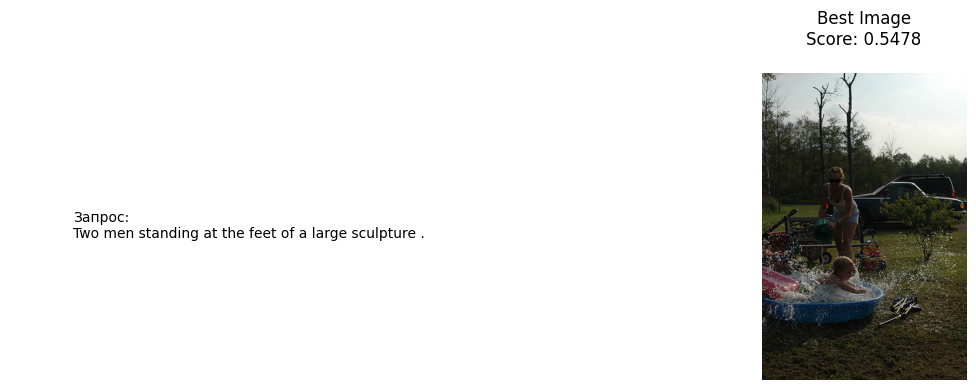

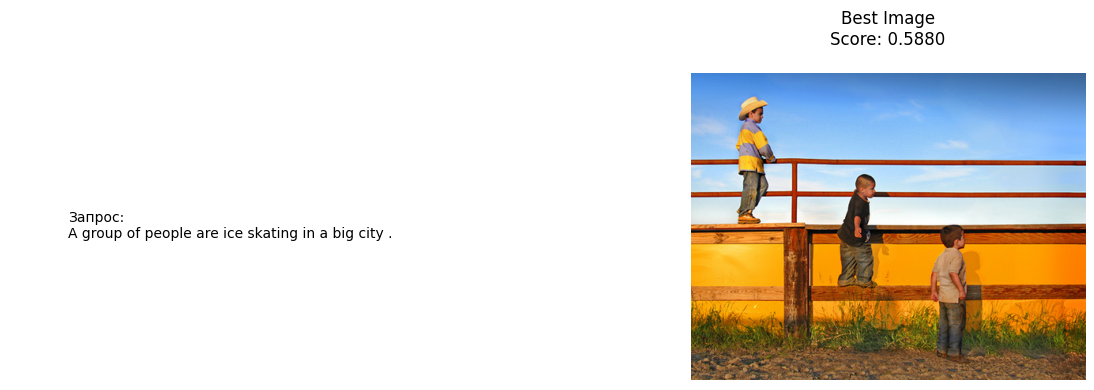

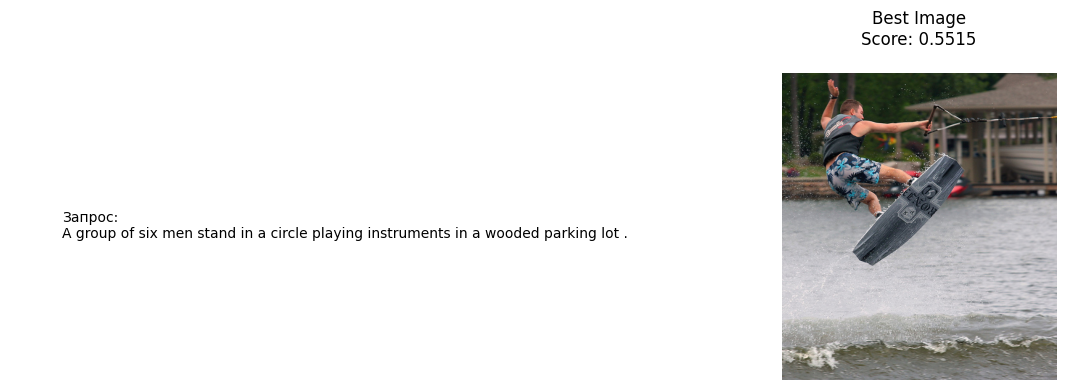

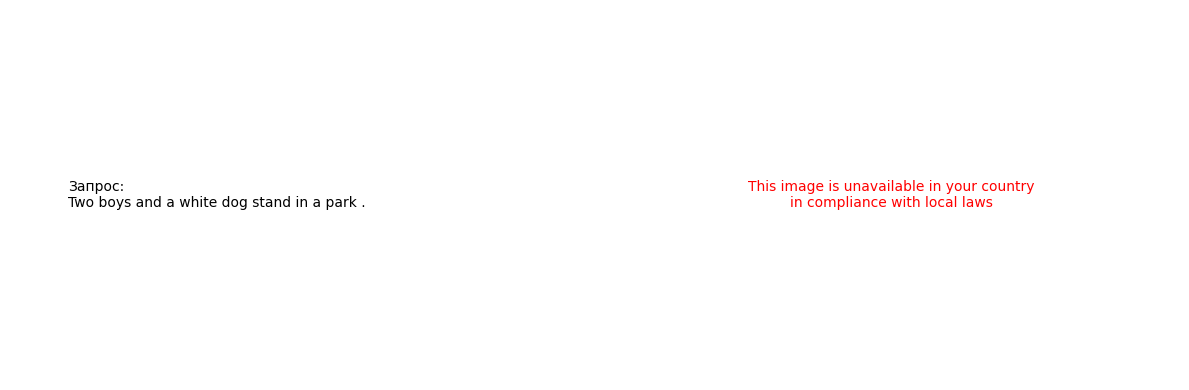

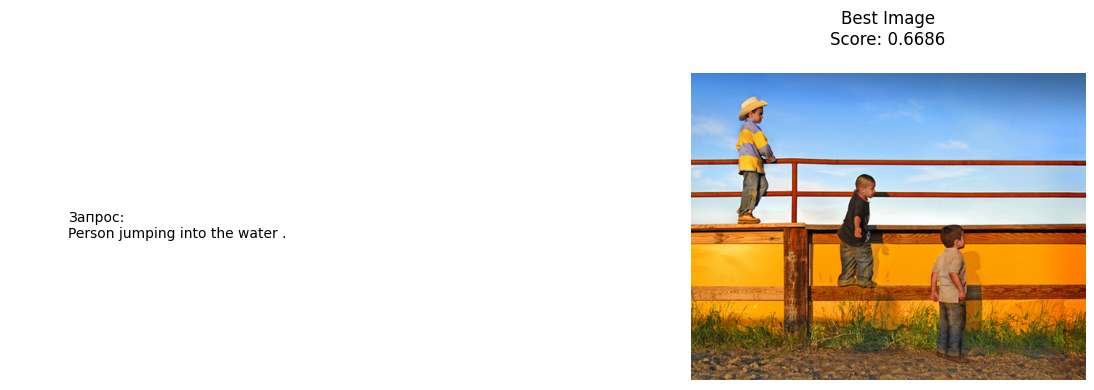

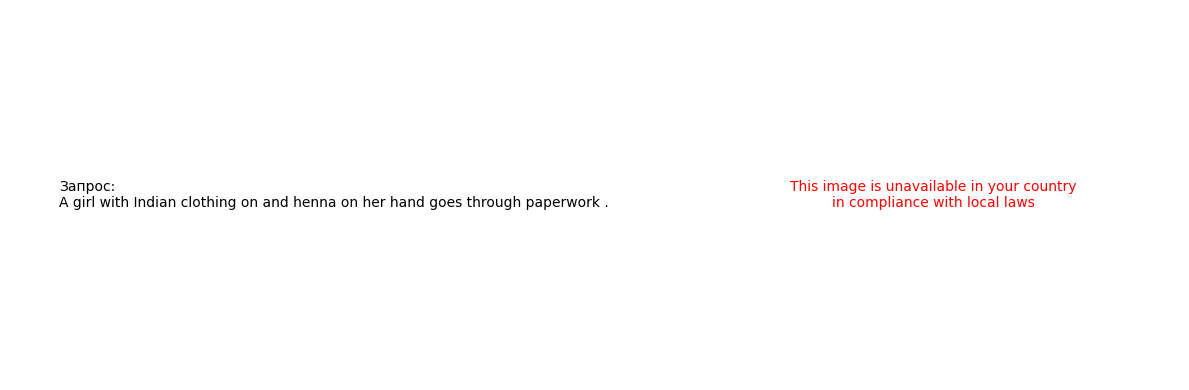

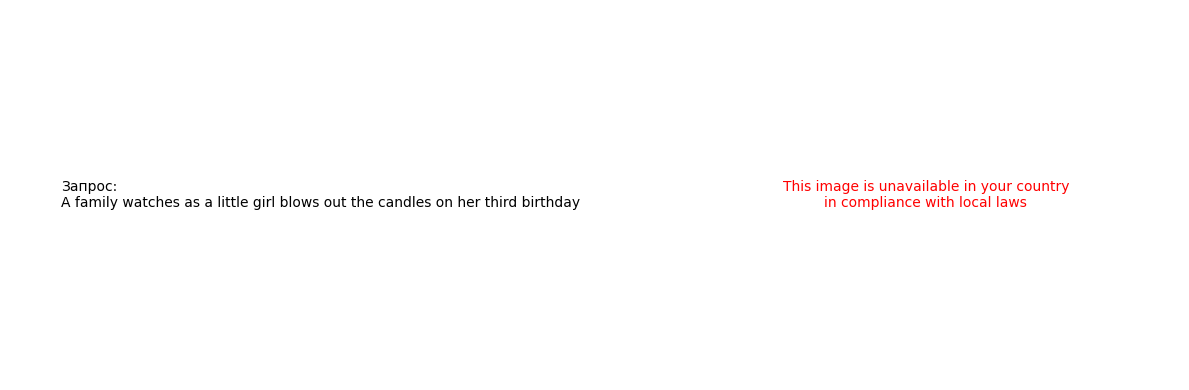

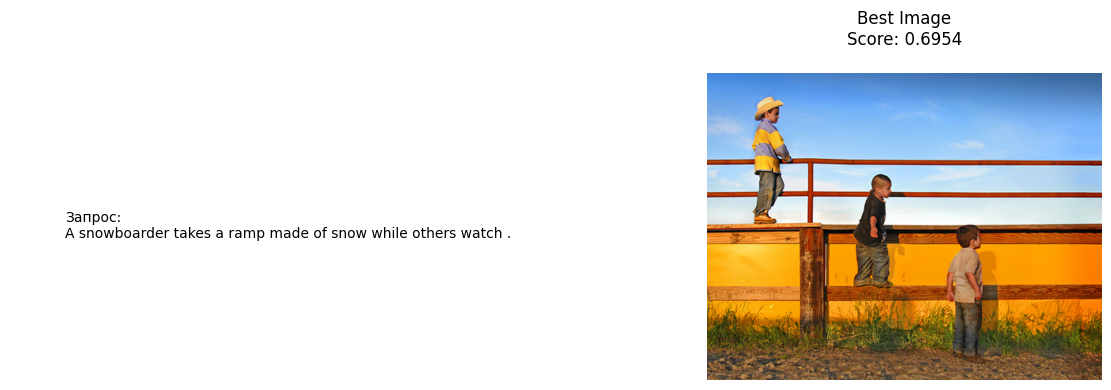

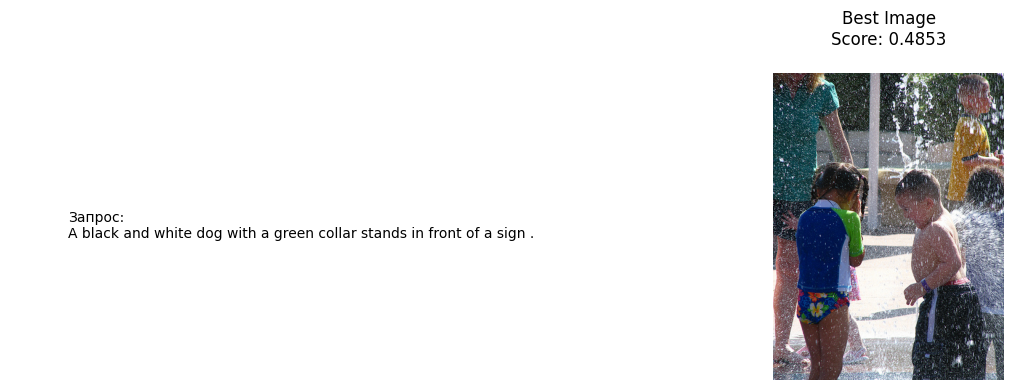

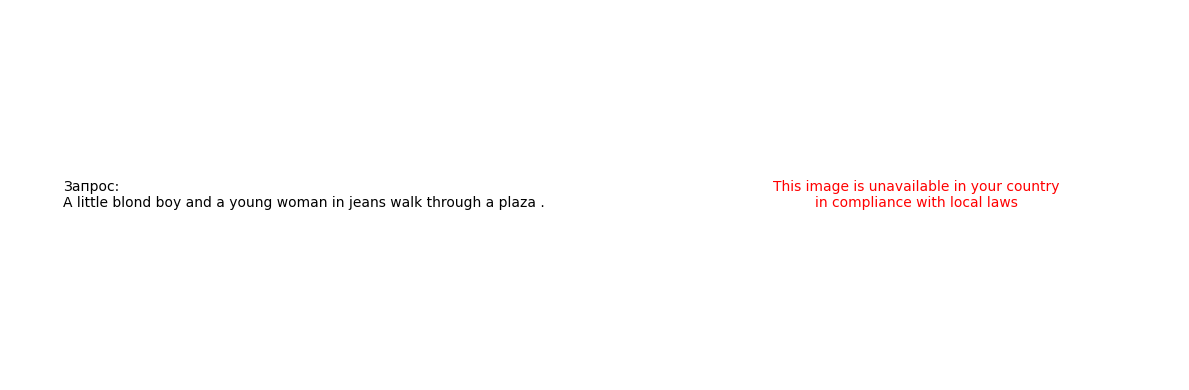

In [37]:
# Применим функцию
display_query_results(
    results_df, 
    test_image_dir, 
    tokenizer,
    bert_model,
    test_image_to_vector,
    scaler,
    lgbm_model,
    n_to_show=10)

**Вывод:**  
В блоке тестирования модель применялась для поиска наиболее подходящего изображения под заданный текстовый запрос.  
Результаты показали, что качество работы модели остаётся невысоким: подбор изображений не всегда точен, а оценки релевантности отличаются от ожидаемых.  
Тем не менее, эксперимент подтвердил саму возможность объединять эмбеддинги изображений и текстов и использовать их для построения поисковой системы.  
Даже при слабых итоговых метриках видно, что модель уловила базовую взаимосвязь между текстами и картинками, что можно развить с помощью улучшения архитектуры и большего объёма данных.


## Итоговый вывод

В ходе проекта была реализована демонстрационная версия поиска изображений по текстовым запросам.  
Основные этапы работы:  
- Загружены и изучены данные (`train_dataset`, аннотации экспертов и краудсорсинга, тестовые запросы и изображения).  
- Проведена очистка и подготовка данных: исключены некорректные записи, обработаны тексты, сформированы целевые метки.  
- Выполнена векторизация изображений с помощью предобученной нейросети и текстов — с помощью модели **BERT**.  
- Построена объединённая матрица признаков, включающая эмбеддинги картинок и описаний.  
- Протестированы разные модели регрессии (LightGBM, CatBoost, нейронная сеть, линейная регрессия, дерево решений, baseline).  
  - Лучший результат показал **LightGBM**, обеспечивший наименьшие ошибки и наибольшее значение R².  
- Проведено тестирование финальной модели в режиме поиска: для случайных запросов подбирались наиболее релевантные изображения.  

**Результаты:**  
Качество подбора изображений оказалось ограниченным, метрики на тесте невысокие, однако сам принцип работы модели подтвердил жизнеспособность подхода. Модель уловила базовую связь между текстами и изображениями, что создаёт основу для дальнейшего развития.  

**Вывод:**  
Проект продемонстрировал полный цикл — от подготовки данных и обучения до тестирования поисковой системы. Несмотря на скромные результаты, работа показала, что объединение эмбеддингов текста и изображений действительно позволяет решать задачу поиска по смыслу. Для улучшения качества можно использовать более мощные архитектуры (например, CLIP), расширенные датасеты и тонкую настройку гиперпараметров.  


##  Выводы

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Проверены экспертные оценки и краудсорсинговые оценки
- [x]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [x]  Изображения векторизованы
- [x]  Текстовые запросы векторизованы
- [x]  Данные корректно разбиты на тренировочную и тестовую выборки
- [x]  Предложена метрика качества работы модели
- [x]  Предложена модель схожести изображений и текстового запроса
- [x]  Модель обучена
- [x]  По итогам обучения модели сделаны выводы
- [-]  Проведено тестирование работы модели
- [-]  По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>